### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

## Part 1- Data Processing

In [2]:
train_datagen = ImageDataGenerator(rescale = 1.0/255, shear_range = 0.2,
                                    zoom_range = 0.2, horizontal_flip = True, 
                                    validation_split = 0.1)
    
training_set = train_datagen.flow_from_directory('/kaggle/input/brain-tumor-classification-mri/Training/',
                                                target_size = (224, 224), 
                                                 batch_size = 32,
                                                shuffle = True)

Found 2870 images belonging to 4 classes.


In [3]:
test_datagen = ImageDataGenerator(rescale = 1.0/255, validation_split = 0.1)
test_set = test_datagen.flow_from_directory('/kaggle/input/brain-tumor-classification-mri/Testing/',
                                            target_size = (224, 224), 
                                            batch_size = 32, shuffle = False)

Found 394 images belonging to 4 classes.


In [4]:
images, labels = next(training_set)
images.shape

(32, 224, 224, 3)

### Lets see an image from training

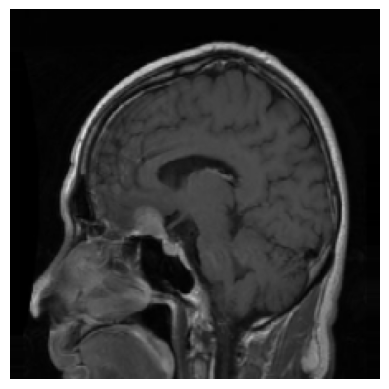

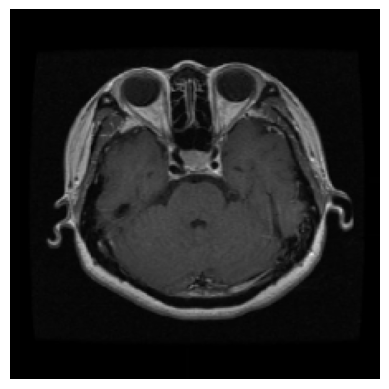

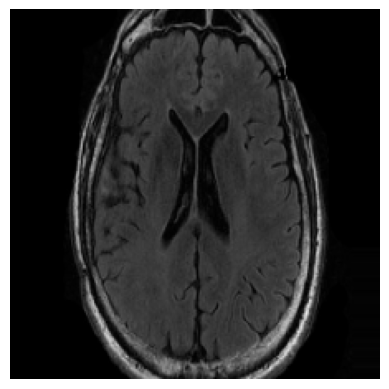

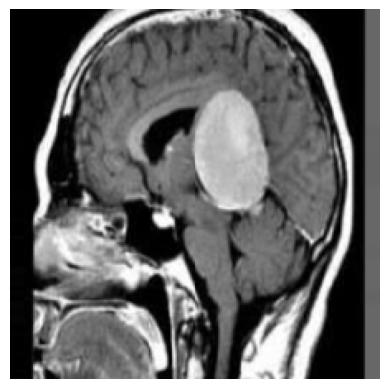

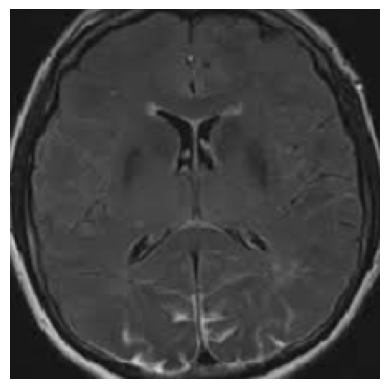

In [5]:
images, labels = next(training_set) 
for i in range(5):
    plt.imshow(images[i])
    plt.axis('off')
    plt.show()

## Part 2- Initializing the model

In [6]:
model = VGG16(include_top = False, weights = 'imagenet', input_shape = (224, 224, 3))
## include False fully connected eklememek için

58889256/58889256 [==============================] - 0s 0us/step


In [7]:
layers = dict([(layer.name, layer.output) for layer in model.layers])
layers

{'input_1': <KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_1')>,
 'block1_conv1': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv1')>,
 'block1_conv2': <KerasTensor: shape=(None, 224, 224, 64) dtype=float32 (created by layer 'block1_conv2')>,
 'block1_pool': <KerasTensor: shape=(None, 112, 112, 64) dtype=float32 (created by layer 'block1_pool')>,
 'block2_conv1': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv1')>,
 'block2_conv2': <KerasTensor: shape=(None, 112, 112, 128) dtype=float32 (created by layer 'block2_conv2')>,
 'block2_pool': <KerasTensor: shape=(None, 56, 56, 128) dtype=float32 (created by layer 'block2_pool')>,
 'block3_conv1': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv1')>,
 'block3_conv2': <KerasTensor: shape=(None, 56, 56, 256) dtype=float32 (created by layer 'block3_conv2')>,
 'block3_conv3': <KerasTensor: shape=(None, 

In [8]:
for layer_name, layer_output in layers.items():
    print(layer_name, layer_output.shape)

input_1 (None, 224, 224, 3)
block1_conv1 (None, 224, 224, 64)
block1_conv2 (None, 224, 224, 64)
block1_pool (None, 112, 112, 64)
block2_conv1 (None, 112, 112, 128)
block2_conv2 (None, 112, 112, 128)
block2_pool (None, 56, 56, 128)
block3_conv1 (None, 56, 56, 256)
block3_conv2 (None, 56, 56, 256)
block3_conv3 (None, 56, 56, 256)
block3_pool (None, 28, 28, 256)
block4_conv1 (None, 28, 28, 512)
block4_conv2 (None, 28, 28, 512)
block4_conv3 (None, 28, 28, 512)
block4_pool (None, 14, 14, 512)
block5_conv1 (None, 14, 14, 512)
block5_conv2 (None, 14, 14, 512)
block5_conv3 (None, 14, 14, 512)
block5_pool (None, 7, 7, 512)


### CNN model

In [9]:
cnn_model = Sequential()
cnn_model.add(model)
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dense(units = 64, activation = 'relu'))
cnn_model.add(Dense(units = 4, activation = 'softmax'))

In [10]:
model.trainable = False
## eğitilebilir hale getirmek için

In [11]:
cnn_model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
history = cnn_model.fit(x = training_set, validation_data = test_set, epochs = 1, verbose=1, batch_size=32)

90/90 [==============================] - 949s 11s/step - loss: 0.7783 - accuracy: 0.6990 - val_loss: 1.2558 - val_accuracy: 0.5533


1/1 [==============================] - 9s 9s/step


ValueError: num must be an integer with 1 <= num <= 40, not 41

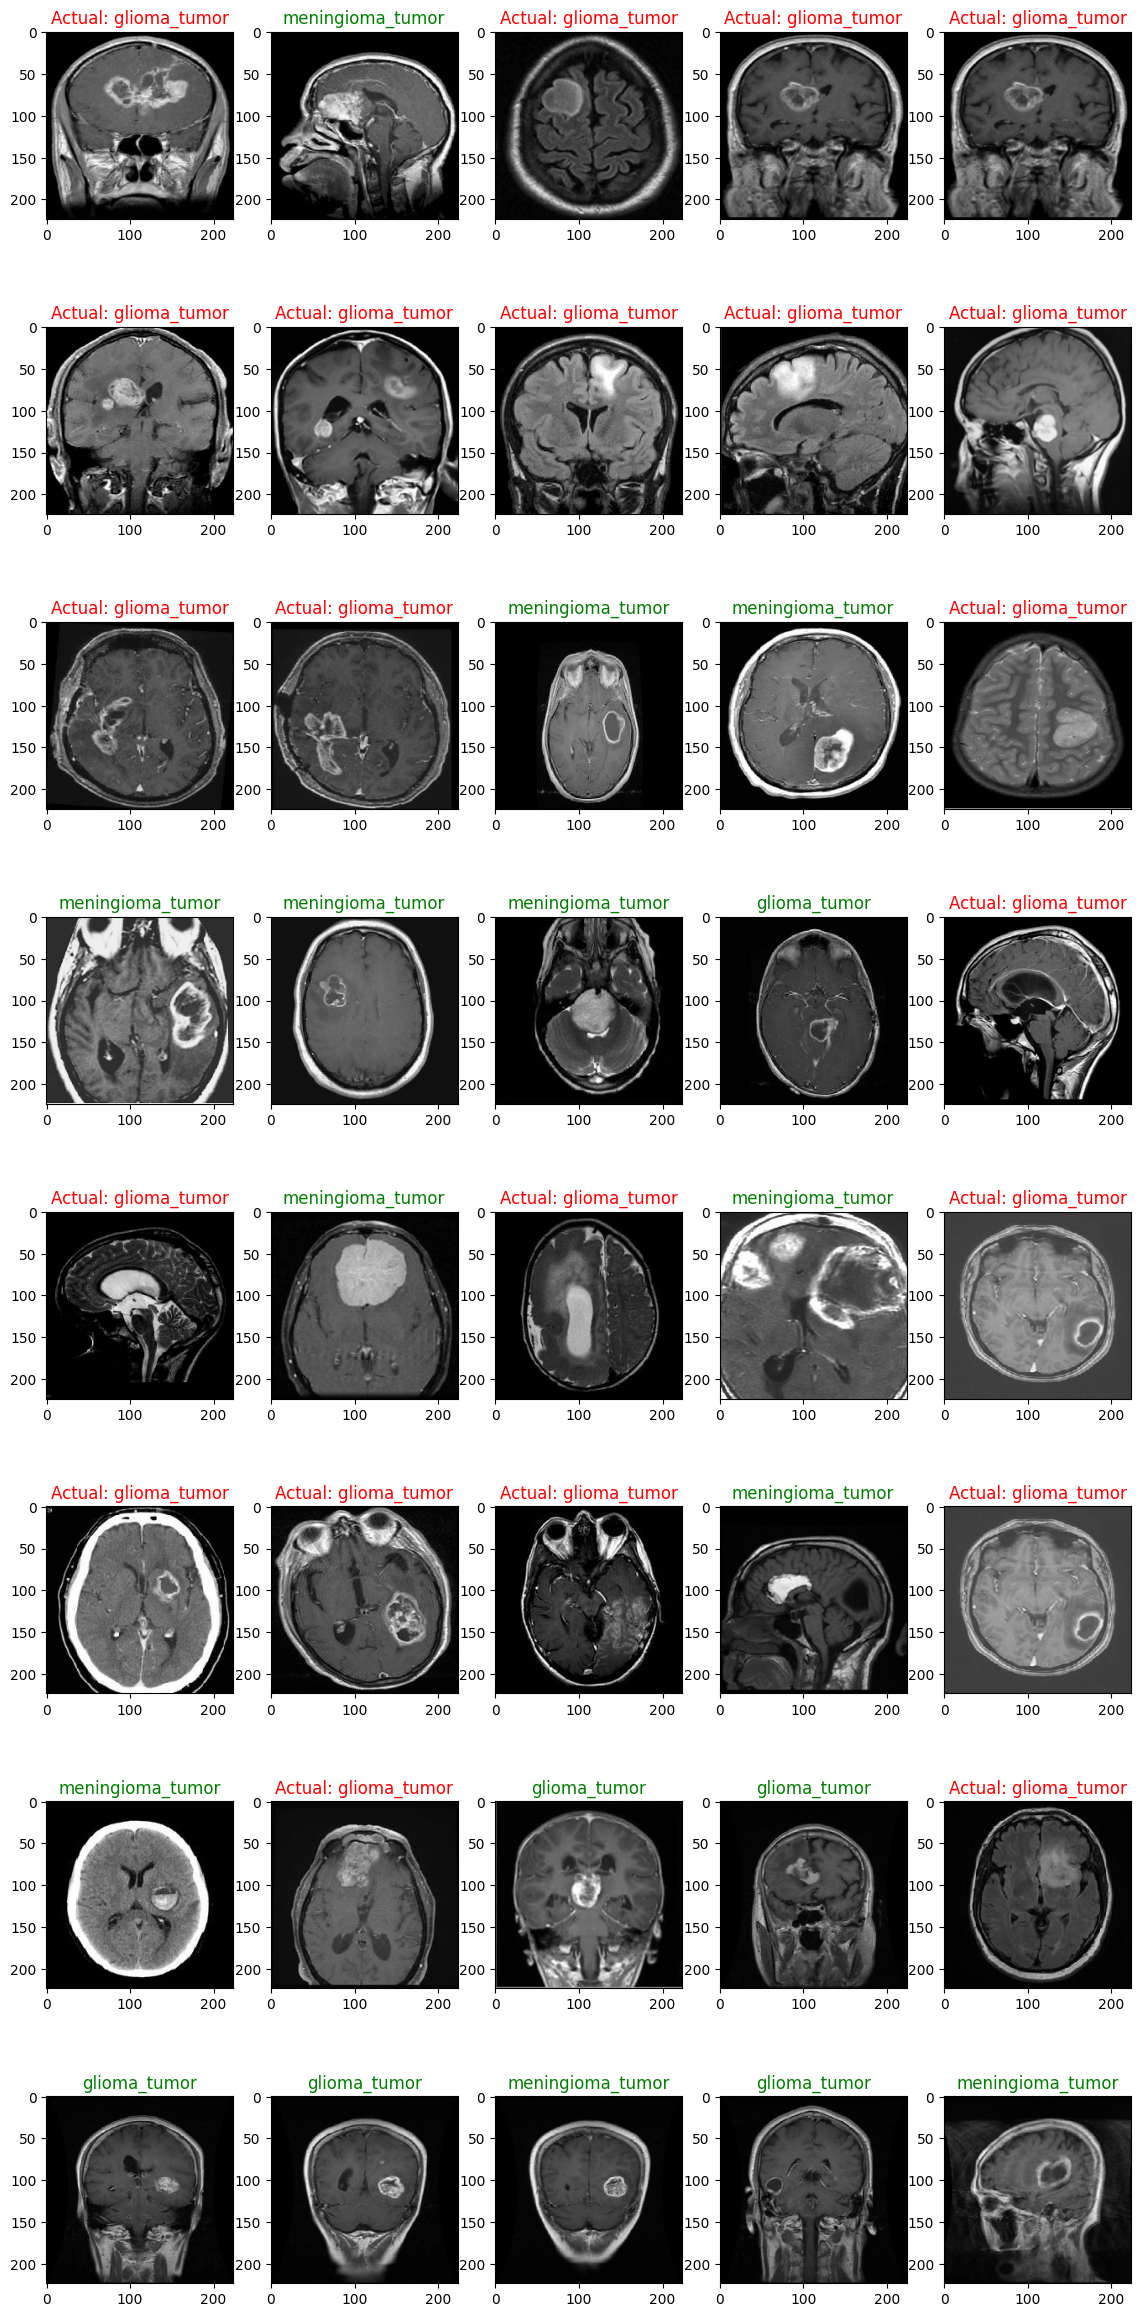

In [15]:
labels_name = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']
plt.figure(figsize=(14, 30))
for i in range(4):
    pred = cnn_model.predict(test_set[i][0])
    for j in range(len(pred)):
        plt.subplot(8, 5, (10 * i) + j + 1)
        plt.imshow(test_set[i][0][j])
                   
        # Choose the class with the highest predicted probability
        labels_pred = np.argmax(pred[j])
        true_label = test_set[i][1][j]
        
        
        if (labels_pred == true_label).any():
            plt.title(labels_name[labels_pred], color='g')
        else:
            plt.title(f'Actual: {labels_name[true_label.all()]}', color='r')

plt.show()